ST 2195 Qn 5

# Use the available variables to construct a model that predicts delays.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot

In [2]:
df2006 = pd.read_csv("2006.csv")

From question 3 we found the busiest airport which is 'ATL' and it top 4 destination 'LGA','DFW','MCO','EWR'. We will use this 5 airport to create the model. To get other airport data we just have to change the iata of the airport.

In [3]:
array = ('ATL','LGA','DFW','MCO','EWR')
df = df2006.loc[(df2006['Origin'].isin(array)) & (df2006['Dest'].isin(array))]

We create a new column so that it can be used for training and testing data.

In [4]:
df['ArrDelay_15'] = df['ArrDelay'].apply(lambda x: '1' if x >= 15 else '0')

C:\Users\lisha\AppData\Local\Temp\ipykernel_14360\531105141.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ArrDelay_15'] = df['ArrDelay'].apply(lambda x: '1' if x >= 15 else '0')


We keep the relevant data that we will be using for this model.

In [5]:
df1 = df[["Month","DayofMonth","DayOfWeek","Origin","Dest","CRSDepTime","ArrDelay_15"]]

we will check for any na values which in this there no is na values that needs to be taken care of.

In [6]:
df1.isnull().sum()

Month          0
DayofMonth     0
DayOfWeek      0
Origin         0
Dest           0
CRSDepTime     0
ArrDelay_15    0
dtype: int64

Now we want change the 24 hour time shown as 0000 to something can be used for 24 hour clock shown like 00:00. we divide by 100 so that the last digits will be after the decimal place for prediction later. 

In [7]:
import math

for index, row in df1.iterrows():
    df1.loc[index, 'CRSDepTime'] = math.floor(row['CRSDepTime'] / 100)
df1

,Month,DayofMonth,DayOfWeek,Origin,Dest,CRSDepTime,ArrDelay_15
201324,1,7,6,ATL,EWR,12,0
210224,1,21,6,ATL,EWR,12,1
214994,1,28,6,EWR,ATL,9,0
215350,1,7,6,EWR,ATL,9,0
215906,1,14,6,ATL,EWR,12,1
...,...,...,...,...,...,...,...
7141839,12,29,5,LGA,MCO,15,0
7141902,12,29,5,DFW,ATL,7,0
7141903,12,29,5,ATL,MCO,11,0
7141917,12,29,5,ATL,EWR,12,0


Now we change the column data 'Origin' and 'Dest' with its values to columns. 

In [8]:
df2 = pd.get_dummies(df1, columns=['Origin' , 'Dest'])
df2

,Month,DayofMonth,DayOfWeek,CRSDepTime,ArrDelay_15,Origin_ATL,Origin_DFW,Origin_EWR,Origin_LGA,Origin_MCO,Dest_ATL,Dest_DFW,Dest_EWR,Dest_LGA,Dest_MCO
201324,1,7,6,12,0,1,0,0,0,0,0,0,1,0,0
210224,1,21,6,12,1,1,0,0,0,0,0,0,1,0,0
214994,1,28,6,9,0,0,0,1,0,0,1,0,0,0,0
215350,1,7,6,9,0,0,0,1,0,0,1,0,0,0,0
215906,1,14,6,12,1,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7141839,12,29,5,15,0,0,0,0,1,0,0,0,0,0,1
7141902,12,29,5,7,0,0,1,0,0,0,1,0,0,0,0
7141903,12,29,5,11,0,1,0,0,0,0,0,0,0,0,1
7141917,12,29,5,12,0,1,0,0,0,0,0,0,1,0,0


We split the train and test set.

In [9]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(df2.drop('ArrDelay_15', axis=1), df2['ArrDelay_15'], test_size=0.3, random_state=42)

In [10]:
train_x.shape

(82743, 14)

In [11]:
test_x.shape

(35462, 14)

In [12]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=28, n_estimators=100)
model.fit(train_x, train_y)

RandomForestClassifier(random_state=28)

Now we find the score of this model right prediction out of total predictions.

In [13]:
predicted = model.predict(test_x)
model.score(test_x, test_y)

0.7595736281089617

Finding effciency of the model.

In [14]:
from sklearn.metrics import roc_auc_score
probability = model.predict_proba(test_x)

In [15]:
roc_auc_score(test_y, probability[:, 1])

0.7676771224648438

In [16]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_y, predicted)

array([[21849,  3266],
       [ 5260,  5087]], dtype=int64)

Now we the find accuracy of positive accuracy and completeness of positive predictions.

In [17]:
from sklearn.metrics import precision_score

train_predictions = model.predict(train_x)
precision_score(train_y, train_predictions , pos_label='1')

0.9230220000892498

In [18]:
from sklearn.metrics import recall_score

recall_score(train_y, train_predictions , pos_label='1')

0.8614743856726365

Now we plot the roc curve.

In [19]:
import seaborn as sns

sns.set()

In [20]:
from sklearn.metrics import roc_curve

Text(0, 0.5, 'True Positive Rate')

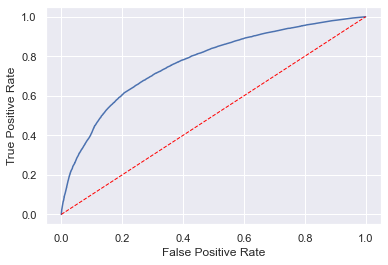

In [21]:
fpr, tpr, _ = roc_curve(test_y, probability[:, 1],  pos_label='1')
plot.plot(fpr, tpr)
plot.plot([0, 1], [0, 1], color='red', lw=1, linestyle='--')
plot.xlabel('False Positive Rate')
plot.ylabel('True Positive Rate')

We create the delay prediction with following code.

In [22]:
def predict_delay(departure_date_time, origin, dest):
    from datetime import datetime
    try:
        departure_date_time_parsed = datetime.strptime(departure_date_time, '%d/%m/%Y %H:%M:%S')
    except ValueError as e:
        return 'Error parsing date/time - {}'.format(e)      # If we were to type something that gives error this will be shown.
    
    month = departure_date_time_parsed.month
    day = departure_date_time_parsed.day
    day_of_week = departure_date_time_parsed.isoweekday()
    hour = departure_date_time_parsed.hour
    origin = origin.upper()
    dest = dest.upper()
    
    input = [{'Month' : month,
              'DayofMonth' : day,
              'DayOfWeek' : day_of_week,
              'CRSDepTime' : hour,
              'Origin_ATL' : 1 if origin == 'ATL' else 0,
              'Origin_DFW' : 1 if origin == 'DFW' else 0,
              'Origin_EWR' : 1 if origin == 'EWR' else 0,
              'Origin_LGA' : 1 if origin == 'LGA' else 0,
              'Origin_MCO' : 1 if origin == 'MCO' else 0,
              'Dest_ATL' : 1 if dest == 'ATL' else 0,
              'Dest_DFW' : 1 if dest == 'DFW' else 0,
              'Dest_EWR' : 1 if dest == 'EWR' else 0,
              'Dest_LGA' : 1 if dest == 'LGA' else 0,
              'Dest_MCO' : 1 if dest == 'MCO' else 0}]
    return model.predict_proba(pd.DataFrame(input))[0][0]

In [23]:
predict_delay('28/2/2006 20:45:00', 'DFW', 'MCO')

0.82

In [24]:
predict_delay('15/10/2006 10:20:00', 'EWR', 'ATL')

0.8126666666666666

In [25]:
predict_delay('25/12/2006 02:10:00', 'LGA', 'DFW')

0.99